In [16]:
import sys

!{sys.executable} -m pip install -U pandas-profiling

In [17]:
#Importamos las librerias

# Operaciones Basicas
import numpy as np
import pandas as pd
import pandas_profiling

# Visualizacion de Datos
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
#Importamos el Dataset.

df_bicis = pd.read_csv ("C:/Users/dbouzada/Downloads/ecobici2018a2020.csv")
df_bicis.head ()

,id_usuario,edad_usuario,genero_usuario,fecha_origen_recorrido,nombre_estacion_origen,direccion_estacion_origen,fecha_destino_recorrido,nombre_estacion_destino,direccion_estacion_destino,tiempo_recorrido
0,179119,51,F,2018-01-01 00:20:14,Hospital Rivadavia,Lucena Pereyra 2516 entre Las Heras y Pagano,2018-01-01 00:47:53,Padilla,Padilla y Warnes Av,27
1,179119,51,F,2018-04-25 23:30:28,Hospital Rivadavia,Lucena Pereyra 2516 entre Las Heras y Pagano,2018-04-26 02:00:51,Hospital Rivadavia,Lucena Pereyra 2516 entre Las Heras y Pagano,30
2,179119,51,F,2018-09-21 19:45:07,Velasco,Velasco 285 entre Julián Álvarez y Lavalleja,2018-09-21 20:10:24,Hospital Rivadavia,Lucena Pereyra 2516 entre Las Heras y Pagano,25
3,400147,27,M,2018-01-01 00:20:22,Macacha Güemes,Macacha Guemes y Juana Manso,2018-01-01 01:09:13,Acuña de Figueroa,Lavalle y Acuña de Figueroa,48
4,400147,27,M,2018-01-21 13:45:48,Aráoz,Aráoz 1413 entre Gorriti y Honduras,2018-01-21 14:00:28,Distrito Audiovisual,Zapiola y Dorrego,14


In [19]:
print('Este data set tiene ' + str(df_bicis.shape[0]) + ' filas, y ' + str(df_bicis.shape[1]) + ' columnas')

Este data set tiene 1946142 filas, y 10 columnas


In [20]:
#Vemos los tipos de variables, unicamente tenemos edad_usuario y tiempo_recorrido como variables numéricas.

df_bicis.dtypes

id_usuario                     int64
edad_usuario                   int64
genero_usuario                object
fecha_origen_recorrido        object
nombre_estacion_origen        object
direccion_estacion_origen     object
fecha_destino_recorrido       object
nombre_estacion_destino       object
direccion_estacion_destino    object
tiempo_recorrido               int64
dtype: object

In [21]:
#Revisamos presencia de valores nulos.

df_bicis.isnull().sum()

id_usuario                    0
edad_usuario                  0
genero_usuario                0
fecha_origen_recorrido        0
nombre_estacion_origen        0
direccion_estacion_origen     0
fecha_destino_recorrido       0
nombre_estacion_destino       0
direccion_estacion_destino    0
tiempo_recorrido              0
dtype: int64

In [ ]:
print(df_bicis['tiempo_recorrido'].values[1])

In [69]:
df_bicis['tiempo_recorrido'].value_counts()

8     100929
9     100488
10     98473
7      97831
11     94693
12     89772
13     85645
14     81559
15     76509
16     70887
17     65964
18     61897
19     57155
20     53515
21     49311
22     46374
23     42950
24     39975
25     37024
26     34576
27     32042
28     30134
29     28137
30     26337
31     24611
32     22946
33     21740
34     20143
35     19247
5      18714
6      18615
36     18041
37     17054
38     16288
39     15413
40     14486
41     13992
42     13213
43     12683
44     12348
45     11833
46     11251
47     10850
48     10457
49     10099
50      9932
51      9398
52      9152
53      9007
54      8515
55      8379
56      7863
58      7497
57      7472
59      6785
0       6111
1       5648
2       5166
3       4733
4       4283
Name: tiempo_recorrido, dtype: int64

In [24]:
df_bicis2 = df_bicis[df_bicis.tiempo_recorrido != 0]
df_bicis2.shape

(1940031, 10)

In [70]:
#Trabajo sobre la variable edad, para quitar los atípicos.

upper_lim = df_bicis['edad_usuario'].quantile(.95)
print(upper_lim)
lower_lim = df_bicis['edad_usuario'].quantile(.05)
print(lower_lim)

df_bicis[(df_bicis['edad_usuario'] > upper_lim) | (df_bicis['edad_usuario'] < lower_lim)].shape

df_bicis2 = df_bicis[(df_bicis['edad_usuario'] < upper_lim) & (df_bicis['edad_usuario'] > lower_lim)]

53.0
19.0


In [73]:
#Trabajo sobre la variable tiempo, para quitar los atípicos.

upper_lim2 = df_bicis2['tiempo_recorrido'].quantile(.98)
print(upper_lim2)
lower_lim2 = df_bicis2['tiempo_recorrido'].quantile(.01)
print(lower_lim2)

df_bicis2[(df_bicis2['tiempo_recorrido'] > upper_lim2) | (df_bicis2['tiempo_recorrido'] < lower_lim2)].shape

df_bicis3 = df_bicis2[(df_bicis['tiempo_recorrido'] < upper_lim2) & (df_bicis2['tiempo_recorrido'] > lower_lim2)]
df_bicis3.head()      

54.0
3.0


C:\Users\dbouzada\AppData\Local\Temp/ipykernel_10832/908887788.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_bicis3 = df_bicis2[(df_bicis['tiempo_recorrido'] < upper_lim2) & (df_bicis2['tiempo_recorrido'] > lower_lim2)]


,id_usuario,edad_usuario,genero_usuario,fecha_origen_recorrido,nombre_estacion_origen,direccion_estacion_origen,fecha_destino_recorrido,nombre_estacion_destino,direccion_estacion_destino,tiempo_recorrido
0,179119,51,F,2018-01-01 00:20:14,Hospital Rivadavia,Lucena Pereyra 2516 entre Las Heras y Pagano,2018-01-01 00:47:53,Padilla,Padilla y Warnes Av,27
1,179119,51,F,2018-04-25 23:30:28,Hospital Rivadavia,Lucena Pereyra 2516 entre Las Heras y Pagano,2018-04-26 02:00:51,Hospital Rivadavia,Lucena Pereyra 2516 entre Las Heras y Pagano,30
2,179119,51,F,2018-09-21 19:45:07,Velasco,Velasco 285 entre Julián Álvarez y Lavalleja,2018-09-21 20:10:24,Hospital Rivadavia,Lucena Pereyra 2516 entre Las Heras y Pagano,25
3,400147,27,M,2018-01-01 00:20:22,Macacha Güemes,Macacha Guemes y Juana Manso,2018-01-01 01:09:13,Acuña de Figueroa,Lavalle y Acuña de Figueroa,48
4,400147,27,M,2018-01-21 13:45:48,Aráoz,Aráoz 1413 entre Gorriti y Honduras,2018-01-21 14:00:28,Distrito Audiovisual,Zapiola y Dorrego,14


In [68]:
df_bicis3.edad_usuario.value_counts()

26    98651
27    96405
25    94069
28    88455
23    87180
24    86547
21    85916
22    85312
29    82361
30    80487
31    67755
20    67740
32    62983
33    52075
34    48115
36    42976
35    42063
37    35627
38    35548
39    33990
40    28623
41    28331
43    27223
42    26568
45    23504
44    23288
47    22050
46    20239
48    18864
49    17687
50    16384
51    14718
52    13836
Name: edad_usuario, dtype: int64

In [28]:
#Data Profiling
profile = pandas_profiling.ProfileReport(df_bicis3)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

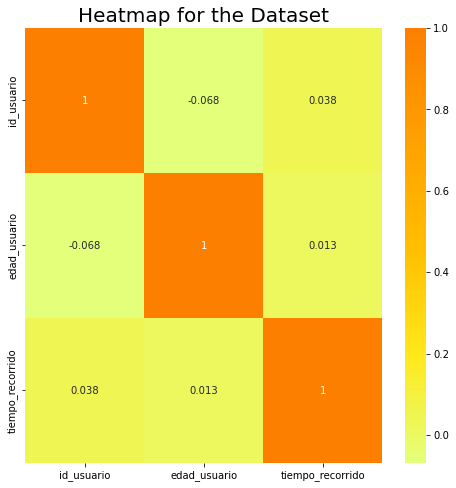

In [29]:
plt.rcParams['figure.figsize'] = (8, 8)

sns.heatmap(df_bicis3.corr(), annot = True, cmap = 'Wistia')
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()

Text(0.5, 1.0, 'Relacion entre edad y recorrido')

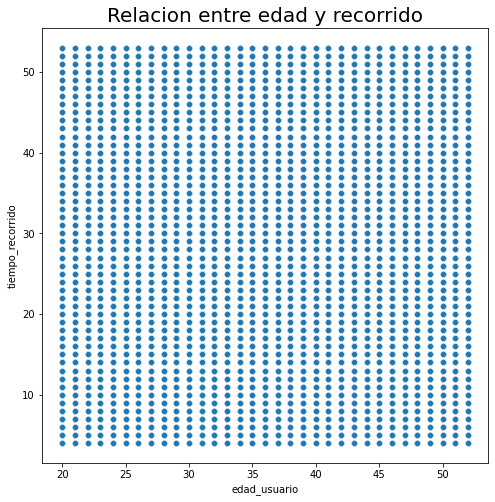

In [30]:
#Edad vs Tiempo
sns.scatterplot(x="edad_usuario", y="tiempo_recorrido", data=df_bicis3)
plt.title('Relacion entre edad y recorrido', fontsize = 20, fontweight = 30)

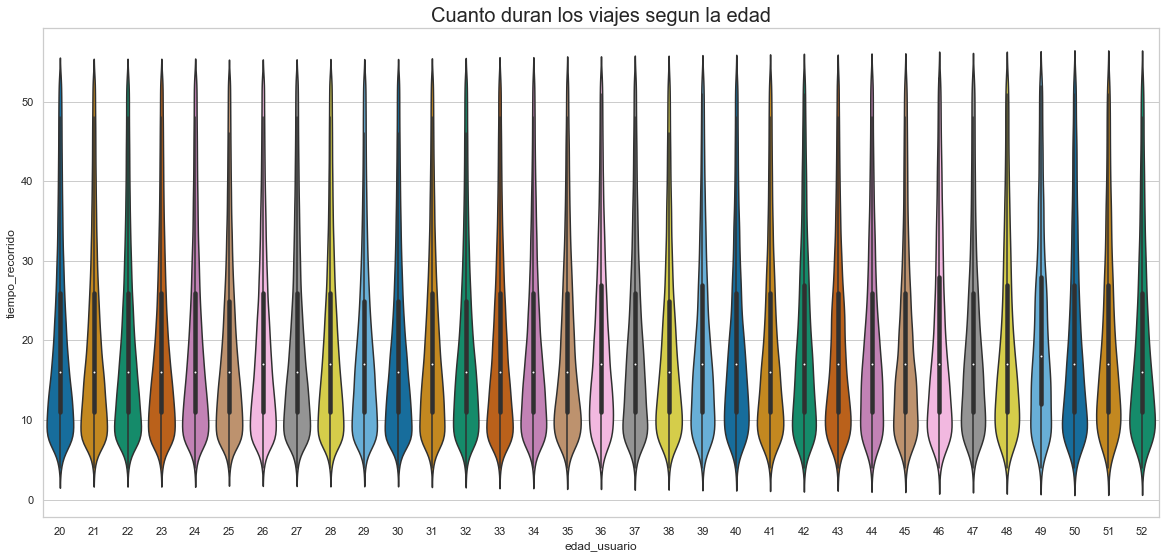

In [66]:
# Relacion Edad y Tiempo de recorrido

plt.rcParams['figure.figsize'] = (20, 9)
sns.violinplot(x='edad_usuario', y='tiempo_recorrido', data=df_bicis3, palette = 'colorblind')
plt.title('Cuanto duran los viajes segun la edad', fontsize = 20, fontweight = 30)
plt.show()

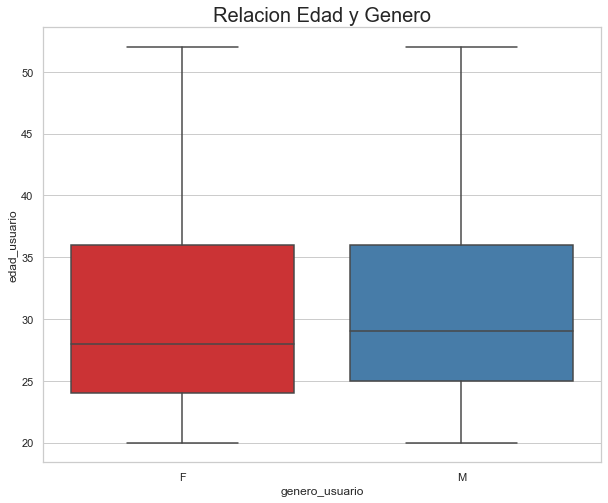

In [67]:
# Relacion Edad y Genero de recorrido
plt.figure(figsize=(10,8))
sns.boxplot(y = 'edad_usuario', x = "genero_usuario",  orient = "v", data = df_bicis3, palette = "Set1")
plt.title('Relacion Edad y Genero', fontsize = 20, fontweight = 30)
plt.show()

In [54]:
#Se nos pide realizar un gráfico con un Groupby, tenemos que generar en principio un filtrado del DF sobre la variable "nombre_estacion_origen" para que nos de la gráfica
#Ya que tenemos muchas estaciones, filtramos por 4.

df_estaciones = df_bicis3[df_bicis3.nombre_estacion_origen.isin(["Facultad de Medicina" , "Velasco", "Macacha Güemes", "Aráoz"])]
df_estaciones.head()

,id_usuario,edad_usuario,genero_usuario,fecha_origen_recorrido,nombre_estacion_origen,direccion_estacion_origen,fecha_destino_recorrido,nombre_estacion_destino,direccion_estacion_destino,tiempo_recorrido
2,179119,51,F,2018-09-21 19:45:07,Velasco,Velasco 285 entre Julián Álvarez y Lavalleja,2018-09-21 20:10:24,Hospital Rivadavia,Lucena Pereyra 2516 entre Las Heras y Pagano,25
3,400147,27,M,2018-01-01 00:20:22,Macacha Güemes,Macacha Guemes y Juana Manso,2018-01-01 01:09:13,Acuña de Figueroa,Lavalle y Acuña de Figueroa,48
4,400147,27,M,2018-01-21 13:45:48,Aráoz,Aráoz 1413 entre Gorriti y Honduras,2018-01-21 14:00:28,Distrito Audiovisual,Zapiola y Dorrego,14
6,400147,27,M,2018-02-02 13:24:37,Macacha Güemes,Macacha Guemes y Juana Manso,2018-02-02 14:02:10,Acuña de Figueroa,Lavalle y Acuña de Figueroa,37
21,400147,27,M,2018-05-13 11:35:15,Aráoz,Aráoz 1413 entre Gorriti y Honduras,2018-05-13 11:48:04,Distrito Audiovisual,Zapiola y Dorrego,12


In [63]:
# Aqui generamos el Groupby, sobre el conteo de las estaciones.

group_estaciones = df_estaciones.groupby('nombre_estacion_origen')["edad_usuario"].count()
group_estaciones

nombre_estacion_origen
Aráoz                    8047
Facultad de Medicina    26209
Macacha Güemes           8990
Velasco                  9694
Name: edad_usuario, dtype: int64

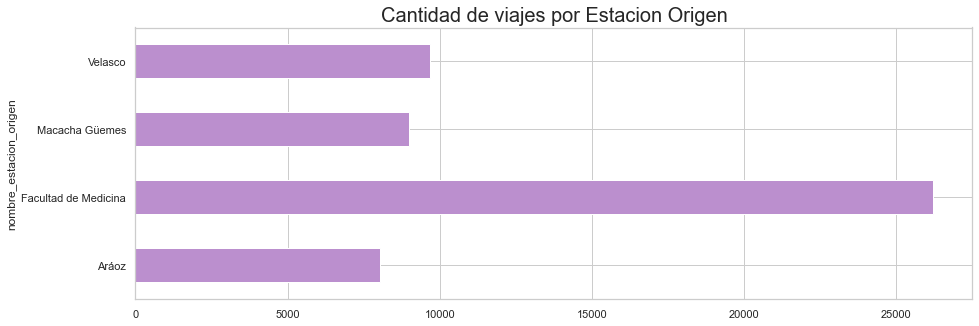

In [65]:
plt.figure(figsize=(15,5))
group_estaciones.plot.barh(stacked=True, color = "#BB8FCE")
plt.title('Cantidad de viajes por Estacion Origen', fontsize = 20, fontweight = 30)
plt.show()